In [16]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
sns.set_context('paper')
pd.set_option('display.max_columns', None)

In [17]:
with open("../Data/simu5_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
# df_study = df_study.loc[df_study.session < 500]
# df_test = df_test.loc[df_test.session < 500]

In [18]:
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,list,session
0,716,141,HOOP,BLUEJAY,1,0
1,1261,862,SEAGULL,MAN,1,0
2,1067,1402,PIKE,SUIT,1,0
3,146,707,BOLT,HIGHWAY,1,0
4,155,1140,BOULDER,PUDDLE,1,0
...,...,...,...,...,...,...
35995,397,606,CRAB,FRIEND,1,5999
35996,829,582,LIPSTICK,FLORIDA,1,5999
35997,1268,394,SENATOR,COWARD,1,5999
35998,1113,965,POSTAGE,NUT,1,5999


In [19]:
df_test

,test_itemno,test_item,correct_ans,lag,list,session
0,716,HOOP,141,5,1,0
1,736,INDIAN,1342,5,1,1
2,1217,RUM,318,1,1,2
3,1119,PREACHER,754,1,1,3
4,13,AIRPORT,327,0,1,4
...,...,...,...,...,...,...
5995,767,JUVENILE,265,5,1,5995
5996,542,EWE,602,0,1,5996
5997,1193,RING,732,2,1,5997
5998,976,OMELET,1569,0,1,5998


### Run CMR-IA

In [20]:
s_mat = np.load('../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [21]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.5,
    beta_rec = 0.45,
    beta_cue = 0.45,
    beta_rec_post = 0.5,
    beta_distract = 0.5,
    gamma_fc = 0.7,
    gamma_cf = 0.5,
    s_fc = 0.1,
    s_cf = 0.1,
    c_thresh = 0.01,
    c_thresh_ass = 0.01,
    a = 2800,
    b = 2.14,
    m = 0,
    n = 1,
    kappa = 0.08,
    lamb = 0.05,
    eta = 0.02,
    phi_s = 1,
    phi_d = 0.6,
    nitems_in_accumulator = 10,
    d_ass = 0.8
)
params

{'beta_enc': 0.5,
 'beta_rec': 0.45,
 'beta_cue': 0.45,
 'beta_rec_new': 0.5,
 'beta_rec_post': 0.5,
 'beta_distract': 0.5,
 'phi_s': 1,
 'phi_d': 0.6,
 's_cf': 0.1,
 's_fc': 0.1,
 'kappa': 0.08,
 'eta': 0.02,
 'omega': 8,
 'alpha': 1,
 'c_thresh': 0.01,
 'c_thresh_ass': 0.01,
 'd_ass': 0.8,
 'lamb': 0.05,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 10,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 2.14,
 'm': 0,
 'n': 1,
 'c1': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.7,
 'gamma_cf': 0.5}

In [22]:
df_simu, f_in, f_dif = cmr.run_norm_cr_multi_sess(params,df_study, df_test ,s_mat)
df_simu

CMR2 Time: 86.15100073814392


,list,session,test_itemno,s_resp,s_rt,csim
0,1,0,716,1599.0,2370.0,0.733075
1,1,1,736,656.0,2720.0,0.641854
2,1,2,1217,318.0,2690.0,0.832915
3,1,3,1119,754.0,1930.0,0.831161
4,1,4,13,327.0,1260.0,0.887423
...,...,...,...,...,...,...
5995,1,5995,767,259.0,1930.0,0.724956
5996,1,5996,542,602.0,1480.0,0.888550
5997,1,5997,1193,755.0,1640.0,0.789477
5998,1,5998,976,1569.0,2270.0,0.891203


In [23]:
df_simu = df_simu.merge(df_test,on=['session','test_itemno'])
df_simu['correct'] = df_simu.s_resp == df_simu.correct_ans
df_simu

,list_x,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,lag,list_y,correct
0,1,0,716,1599.0,2370.0,0.733075,HOOP,141,5,1,False
1,1,1,736,656.0,2720.0,0.641854,INDIAN,1342,5,1,False
2,1,2,1217,318.0,2690.0,0.832915,RUM,318,1,1,True
3,1,3,1119,754.0,1930.0,0.831161,PREACHER,754,1,1,True
4,1,4,13,327.0,1260.0,0.887423,AIRPORT,327,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...
5995,1,5995,767,259.0,1930.0,0.724956,JUVENILE,265,5,1,False
5996,1,5996,542,602.0,1480.0,0.888550,EWE,602,0,1,True
5997,1,5997,1193,755.0,1640.0,0.789477,RING,732,2,1,False
5998,1,5998,976,1569.0,2270.0,0.891203,OMELET,1569,0,1,True


In [24]:
# f_in

In [25]:
sessions = df_simu.session.to_numpy()
for sess in sessions:
    df_tmp = df_study.loc[df_study.session == sess]
    tmp1 = df_tmp.study_itemno1.to_numpy()
    tmp2 = df_tmp.study_itemno2.to_numpy()
    tmp = np.concatenate((tmp1, tmp2))
    tmp = np.sort(tmp)
    testid = np.searchsorted(tmp, df_simu.test_itemno[sess].item())
    corrid = np.searchsorted(tmp, df_simu.correct_ans[sess].item())
    df_simu.loc[df_simu.session == sess, 'corr_fin']= f_dif[sess][0][corrid]
    # df_simu.loc[df_simu.session == sess, 'omean_fin'] = np.mean(np.delete(f_in[sess][0], [testid,corrid]))
    df_simu.loc[df_simu.session == sess, 'omax_fin'] = np.delete(f_dif[sess][0], corrid).max()
df_simu

,list_x,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,lag,list_y,correct,corr_fin,omax_fin
0,1,0,716,1599.0,2370.0,0.733075,HOOP,141,5,1,False,-0.442161,-0.415730
1,1,1,736,656.0,2720.0,0.641854,INDIAN,1342,5,1,False,-0.458384,-0.434569
2,1,2,1217,318.0,2690.0,0.832915,RUM,318,1,1,True,-0.317704,-0.399926
3,1,3,1119,754.0,1930.0,0.831161,PREACHER,754,1,1,True,-0.320798,-0.395129
4,1,4,13,327.0,1260.0,0.887423,AIRPORT,327,0,1,True,-0.260404,-0.440892
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,5995,767,259.0,1930.0,0.724956,JUVENILE,265,5,1,False,-0.467556,-0.420781
5996,1,5996,542,602.0,1480.0,0.888550,EWE,602,0,1,True,-0.247658,-0.441545
5997,1,5997,1193,755.0,1640.0,0.789477,RING,732,2,1,False,-0.368257,-0.391975
5998,1,5998,976,1569.0,2270.0,0.891203,OMELET,1569,0,1,True,-0.236753,-0.422000


In [26]:
df_fin = df_simu.groupby('lag')[['corr_fin','omax_fin']].mean().reset_index()
df_fin['dif'] = df_fin['corr_fin'] - df_fin['omax_fin']
df_fin

,lag,corr_fin,omax_fin,dif
0,0,-0.264348,-0.442689,0.178341
1,1,-0.314463,-0.387127,0.072664
2,2,-0.364000,-0.400750,0.036750
3,3,-0.411028,-0.411617,0.000589
4,4,-0.448742,-0.422223,-0.026518
5,5,-0.463225,-0.432325,-0.030900


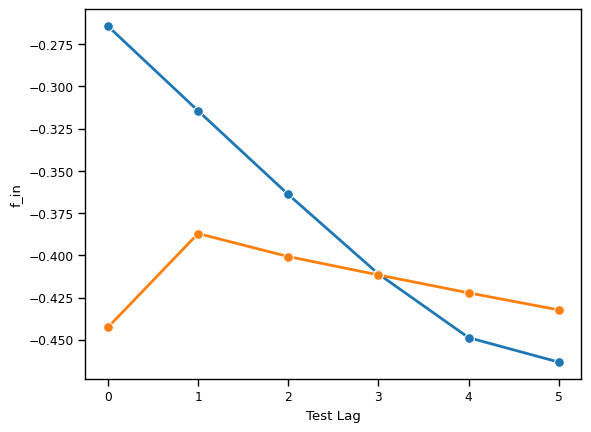

In [27]:
sns.lineplot(data=df_fin, x='lag', y='corr_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omean_fin', linewidth=2, marker='o', markersize = 7)
sns.lineplot(data=df_fin, x='lag', y='omax_fin', linewidth=2, marker='o', markersize = 7)
# plt.ylim([0,1])
plt.xlabel('Test Lag')
plt.ylabel('f_in')
# plt.savefig('fig/simu3_hr.pdf')
plt.show()

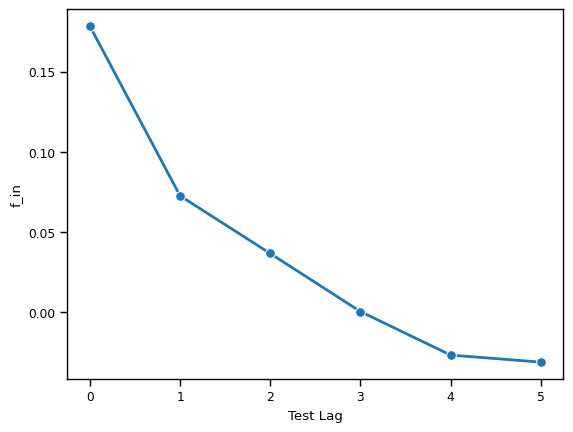

In [28]:
sns.lineplot(data=df_fin, x='lag', y='dif', linewidth=2, marker='o', markersize = 7)
# plt.ylim([0,1])
plt.xlabel('Test Lag')
plt.ylabel('f_in')
# plt.savefig('fig/simu3_hr.pdf')
plt.show()

### PLOT

In [29]:
df_laggp = df_simu.groupby(['lag']).correct.mean().to_frame(name='corr_rate').reset_index()
df_laggp

,lag,corr_rate
0,0,0.835984
1,1,0.530792
2,2,0.357000
3,3,0.236536
4,4,0.192118
5,5,0.194252


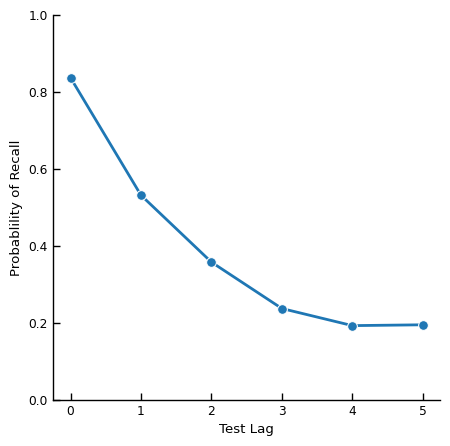

In [30]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_laggp, x='lag', y='corr_rate', linewidth=2, marker='o', markersize = 7)
plt.ylim([0,1])
plt.xlabel('Test Lag')
plt.ylabel('Probablility of Recall')
plt.savefig('fig/simu5_recall.pdf')
plt.show()